In [18]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

from qiskit.quantum_info import Operator

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

from scipy.stats import unitary_group

ibmqfactory.load_account:WARNING:2021-04-18 14:38:05,938: Credentials are already in use. The existing account in the session will be replaced.


In [61]:
#say that our inner product is <s|t>,
#to embed this value in a Unitary we can simply chose to create an identity matrix
#which is the simplest unitary by nature and replace its first column
#with a vector containing our desired inner product as the first value,
#and for normalization purposes sqrt(1-<s|v>) somewhere.
#most convenient place is the last value, since we can symettrically change the last column
#with a vector that is orthagonal to the first vector
#thus preserving unitarity

#example for a 2 qubit 4x4 unitary
#with <s|t> = 0.3


V = np.eye(4)
V[:,0] = [np.sqrt(0.3), 0, 0, np.sqrt(0.7)] 
V[:,3] = [-np.sqrt(0.7), 0, 0, np.sqrt(0.3)]
print(V)

[[ 0.54772256  0.          0.         -0.83666003]
 [ 0.          1.          0.          0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.83666003  0.          0.          0.54772256]]


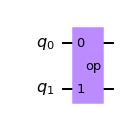

In [64]:
#we can then make this unitary operator a gate
#by the following

circuit = QuantumCircuit(2)

op = Operator(V)
circuit.unitary(op, [0, 1], label='op')

circuit.draw()

In [65]:
#and check if it indeed represents the matrix we had fed it

backend = Aer.get_backend('unitary_simulator')
job = execute(circuit, backend)
result = job.result()
print(np.around(result.get_unitary(circuit), 3))

#indeed this is our intended matrix, just to a less sig figures
#maybe there is a way to preserve the original 

[[ 0.548+0.j  0.   +0.j  0.   +0.j -0.837+0.j]
 [ 0.   +0.j  1.   +0.j  0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  1.   +0.j  0.   +0.j]
 [ 0.837+0.j  0.   +0.j  0.   +0.j  0.548+0.j]]
